In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
!git clone https://github.com/kwansu/RL-env-grid.git

Cloning into 'RL-env-grid'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 101 (delta 48), reused 82 (delta 29), pack-reused 0
Receiving objects: 100% (101/101), 40.85 KiB | 820.00 KiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
!ls

In [5]:
import sys
sys.path.append('/content/drive/MyDrive/RL-env-grid')

In [6]:
!pip install pygame

     |████████████████████████████████| 21.8 MB 1.3 MB/s 


In [7]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys

In [8]:
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [10]:
cd RL-env-grid/

/content/drive/MyDrive/RL-env-grid


10 4


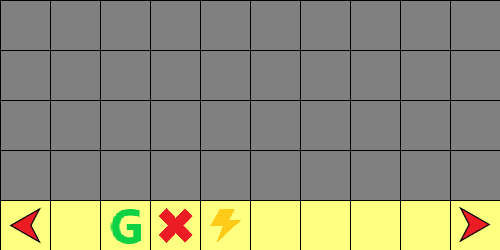

In [11]:
from glob import glob
from states import *
from os.path import basename, splitext
from environment.grid_world import GridWorld


def show(x):
    img_bgr = x.get_image()
    cv2_imshow(img_bgr)


State.render_policy = True
State.render_value = True
items = (State, Goal, Trap, Pusher)
img_dict = {splitext(basename(x))[0]: x for x in glob("sprites/*.png")}
env = GridWorld(10, 4, items=items, img_dict=img_dict, is_render=False, state_length=50)
show(env)

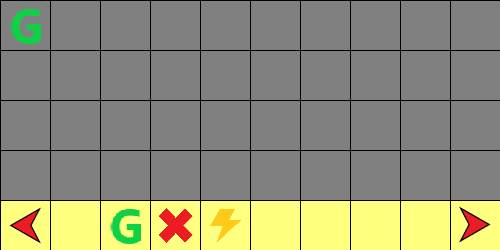

In [13]:
env.change_state((0, 0), Goal)
show(env)

In [14]:
import numpy as np
from states import *


class Agent:
    def __init__(self, size, action_size=4, gamma=0.9):
        self.size = size
        self.action_size = action_size
        self.state_values = np.zeros(size)
        self.policy = np.ones((*size, self.action_size)) * (1 / self.action_size)
        self.actions = ["up", "down", "left", "right"]
        self.gamma = gamma

    def reset(self):
        self.policy = np.ones((*self.size, self.action_size)) * (1 / self.action_size)
        self.state_values = np.zeros(self.size)

    def evaluate_policy(self, states):
        copy = self.state_values.copy()
        row, col = self.state_values.shape
        for x in range(row):
            for y in range(col):
                if states[x, y].is_terminal:
                    continue
                new_v = 0
                for action, pa in zip(self.actions, self.policy[x, y]):
                    for pos, p in states[x, y].get_action_trans_prob(action).items():
                        new_v += pa * p * (states[pos].reward + self.gamma * copy[pos])
                self.state_values[x, y] = new_v

    def imporve_policy(self, states):
        row, col = self.state_values.shape
        for x in range(row):
            for y in range(col):
                max_q = float("-inf")
                for i, action in enumerate(self.actions):
                    q = 0
                    for pos, p in states[x, y].get_action_trans_prob(action).items():
                        q += p * (states[pos].reward + self.gamma * self.state_values[pos])
                    # q = sum(
                    #     [
                    #         p * (states[pos].reward + self.gamma * states[pos])
                    #         for pos, p in states[x, y].get__action_trans_prob(action)
                    #     ]
                    # )
                    if q > max_q:
                        max_q, max_count = q, 1
                        self.policy[x, y, :] = 0
                        self.policy[x, y, i] = 1
                    elif q == max_q:
                        max_count += 1
                        self.policy[x, y, i] = 1
                self.policy[x, y] /= max_count


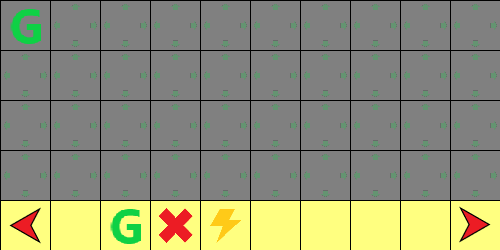

In [16]:
agent = Agent(env.state_shape)
env.draw_policy(agent.policy)
show(env)

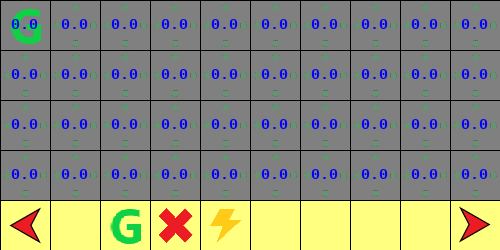

In [20]:
env.draw_values(agent.state_values)
show(env)

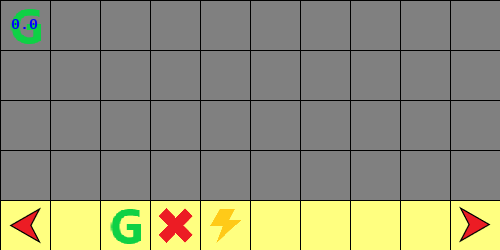

In [21]:
env.reset()
show(env)

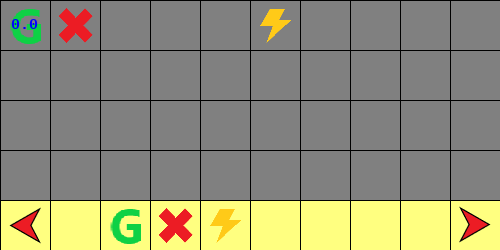

In [23]:
env.change_state((1, 0), Trap)
env.change_state((5, 0), Pusher)
show(env)

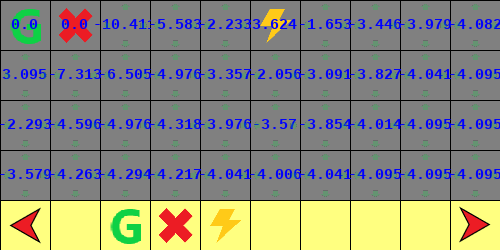

In [25]:
for _ in range(5):
    agent.evaluate_policy(env.states)

env.draw_values(agent.state_values)
show(env)

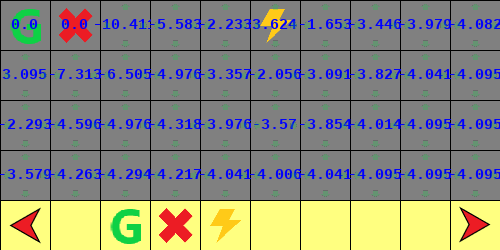

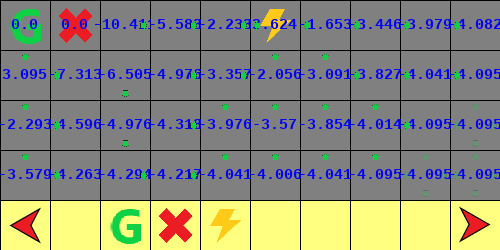

In [27]:
env.draw_policy(agent.policy)
show(env)

agent.imporve_policy(env.states)
env.draw_policy(agent.policy)
show(env)